In [87]:
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
import seaborn as sns
from PIL import Image
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models, applications
import os
tf.config.set_visible_devices([], 'GPU')

___

**Obtain the Data: Get the Dogs vs Cats dataset (see class' notebook, only 5000, not 25,000, images are required, these image set is defined in the notebook)**

In [2]:
# This should point to the small dataset of the Kaggle Dogs vs Cats competition that was created in a previous notebook

data_folder = pathlib.Path("D:\Applied AI & ML\Foundation of Machine Learning\CSCCN8010-labs\CSCN8010\data\kaggle_dogs_vs_cats_small")

In [3]:
train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


-----

**EDA: Explore the data with relevant graphs, statistics and insights (5 points)**

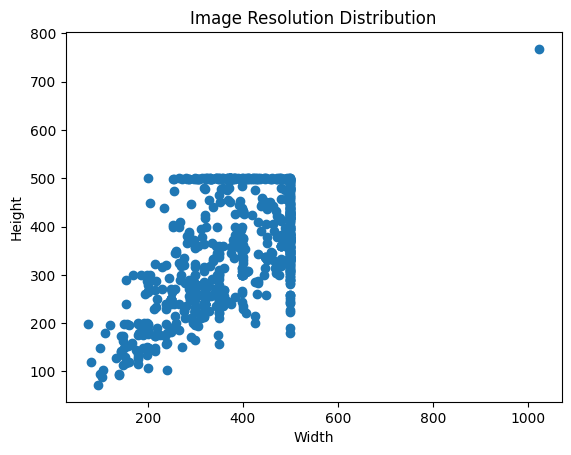

In [ ]:
# load the data
image_sizes = []
folder_path = "D:/Applied AI & ML/Foundation of Machine Learning/CSCCN8010-labs/CSCN8010/data/kaggle_dogs_vs_cats_small/train/cat"
 
for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path)
    image_sizes.append(img.size)
 
plt.scatter(*zip(*image_sizes))
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution")
plt.show()

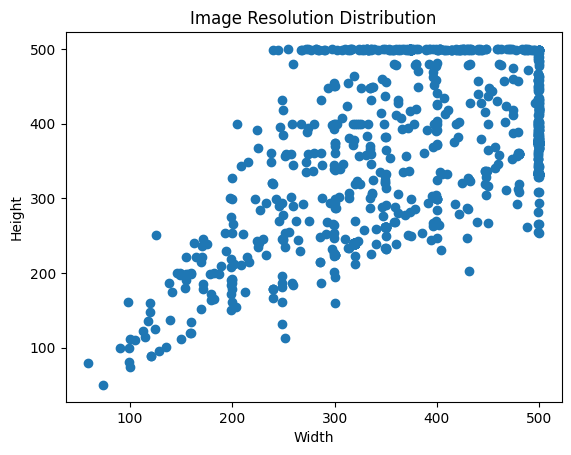

In [88]:
# load the data
image_sizes = []
folder_path = "D:/Applied AI & ML/Foundation of Machine Learning/CSCCN8010-labs/CSCN8010/data/kaggle_dogs_vs_cats_small/train/dog"
 
for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path)
    image_sizes.append(img.size)
 
plt.scatter(*zip(*image_sizes))
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution")
plt.show()

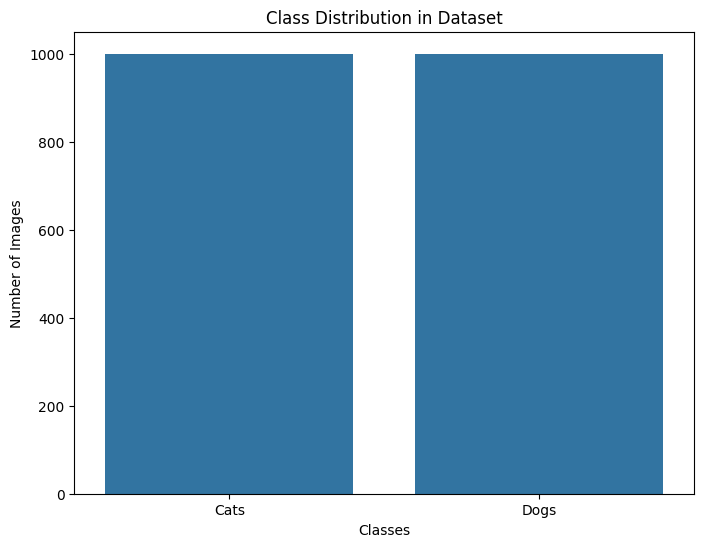

In [4]:
# Directories for dataset
cats_dir = "D:/Applied AI & ML/Foundation of Machine Learning/CSCCN8010-labs/CSCN8010/data/kaggle_dogs_vs_cats_small/train/cat"
dogs_dir = "D:/Applied AI & ML/Foundation of Machine Learning/CSCCN8010-labs/CSCN8010/data/kaggle_dogs_vs_cats_small/train/dog"

# Count the images in each directory
cats_count = len([img for img in os.listdir(cats_dir) if img.endswith(('png', 'jpg', 'jpeg'))])
dogs_count = len([img for img in os.listdir(dogs_dir) if img.endswith(('png', 'jpg', 'jpeg'))])

# Plot the distribution
classes = ["Cats", "Dogs"]
counts = [cats_count, dogs_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=classes, y=counts)
plt.title("Class Distribution in Dataset")
plt.ylabel("Number of Images")
plt.xlabel("Classes")
plt.show()

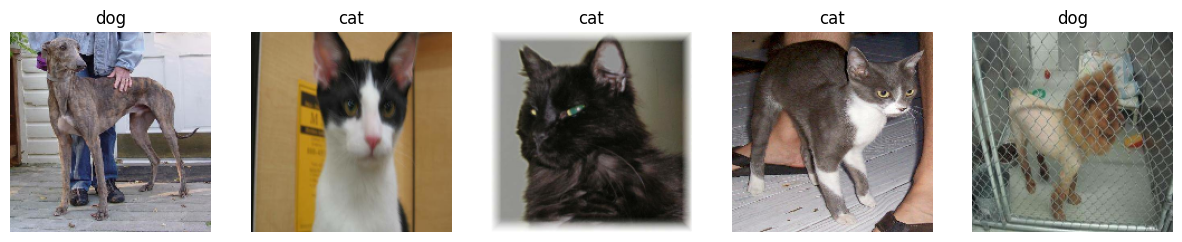

In [6]:
# Function to display sample images
def display_samples(dataset, class_names, num_samples=5):
    plt.figure(figsize=(15, 5))
    for images, labels in dataset.take(1):
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i].numpy()])
            plt.axis("off")
    plt.show()

# Display samples from training dataset
class_names = train_dataset.class_names
display_samples(train_dataset, class_names)


------

**Define a Neural Network of your choice (3 points)**

In [7]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [9]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.h5",
        save_best_only=True,
        monitor="val_loss")
]
history_cnn = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 42s 658ms/step - loss: 0.7040 - accuracy: 0.5170 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 50s 800ms/step - loss: 0.6930 - accuracy: 0.5330 - val_loss: 0.6854 - val_accuracy: 0.5850
Epoch 3/30
63/63 [==============================] - 45s 710ms/step - loss: 0.6811 - accuracy: 0.5775 - val_loss: 0.6622 - val_accuracy: 0.5990
Epoch 4/30
63/63 [==============================] - 42s 659ms/step - loss: 0.6553 - accuracy: 0.6215 - val_loss: 0.6182 - val_accuracy: 0.6660
Epoch 5/30
63/63 [==============================] - 40s 640ms/step - loss: 0.6109 - accuracy: 0.6765 - val_loss: 0.6403 - val_accuracy: 0.6350
Epoch 6/30
63/63 [==============================] - 39s 612ms/step - loss: 0.5973 - accuracy: 0.6900 - val_loss: 0.5998 - val_accuracy: 0.6820
Epoch 7/30
63/63 [==============================] - 38s 607ms/step - loss: 0.5724 - accuracy: 0.6995 - val_loss: 0.5608 - val_accuracy: 0.7110

In [12]:
# Evaluate accuracy
test_model_CNN = load_model("./models/convnet_from_scratch.h5")
test_loss, test_accuracy = test_model_CNN.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")


63/63 [==============================] - 7s 108ms/step - loss: 0.5673 - accuracy: 0.7520
Test Accuracy: 0.75


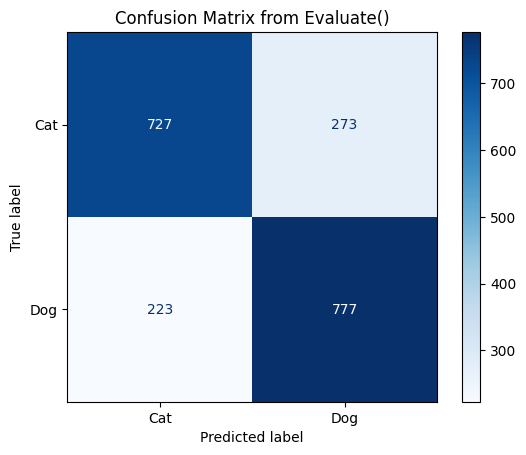

Classification Report:
              precision    recall  f1-score   support

         Cat       0.77      0.73      0.75      1000
         Dog       0.74      0.78      0.76      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



In [49]:
# Step 1: Initialize arrays to collect true labels and predictions
y_true = []
y_pred = []

# Step 2: Use `evaluate()` loop to populate `y_true` and `y_pred`
for images, labels in test_dataset:
    outputs = test_model_CNN(images, training=False)  # Get outputs from the model during evaluation
    y_true.extend(labels.numpy())  # Append true labels
    y_pred.extend((outputs.numpy() > 0.5).astype(int))  # Append binary predictions

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 3: Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Cat", "Dog"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix from Evaluate()")
plt.show()

# Generate classification metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))



#### Summary for Vanilla CNN
- Precision:
    - Cat: 0.77
        - Out of all the samples predicted as "Cat," 77% are correct.
    - Dog: 0.74
        - Out of all the samples predicted as "Dog," 74% are correct.
    - The model has slightly better precision for "Cat," indicating fewer false positives for "Cat" compared to "Dog."
- Recall:
    - Cat: 0.73
    - The model correctly identifies 73% of actual "Cat" samples.
    - Dog: 0.78
    - The model correctly identifies 78% of actual "Dog" samples.
    - The recall for "Dog" is slightly higher, meaning the model is better at identifying "Dog" samples compared to "Cat."
- F1-Score:
    - Cat: 0.75
    - Dog: 0.76
    - F1-scores are nearly equal, reflecting a balance between precision and recall for both classes.
- Accuracy: 75%
    - The model correctly classifies 1,500 out of 2,000 samples.


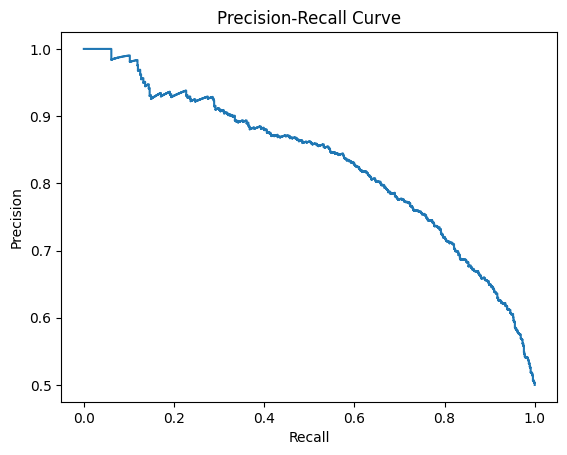

In [37]:
# Step 1: Initialize arrays to collect true labels and predictions
y_true = []
y_scores = []  # To collect the predicted scores (probabilities)

# Step 2: Use `evaluate()` loop to populate `y_true` and `y_scores`
for images, labels in test_dataset:
    outputs = test_model_CNN(images, training=False)  # Get outputs from the model during evaluation
    y_true.extend(labels.numpy())  # Append true labels
    y_scores.extend(outputs.numpy())  # Append predicted probabilities

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Step 3: Compute precision and recall
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Step 4: Plot the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()


- Precision:
    - The y-axis represents precision, which is the proportion of true positive predictions out of all positive predictions made by the model.
    - Higher precision indicates fewer false positives.
- Recall:
    - The x-axis represents recall, which is the proportion of true positives correctly identified by the model out of all actual positive samples.
    - Higher recall indicates fewer false negatives.
- Curve Characteristics:
    - The curve starts at the top left (high precision, low recall) and moves towards the bottom right (low precision, high recall).
    - A sharp drop in precision occurs as recall increases, which reflects the model making more false positives at higher recall values.


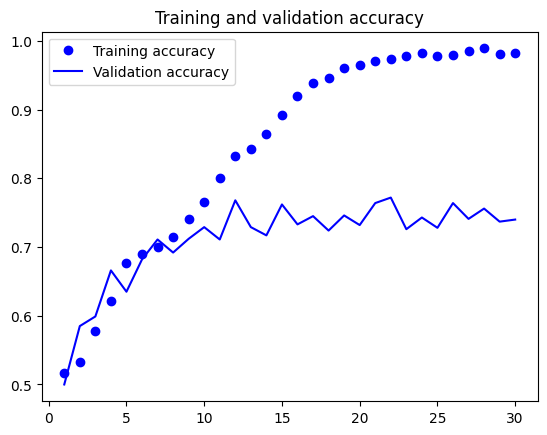

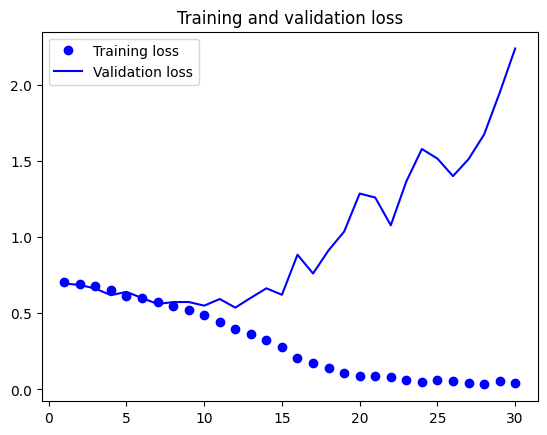

In [22]:
# Plot the training and validation loss and accuracy
accuracy = history_cnn.history["accuracy"]
val_accuracy = history_cnn.history["val_accuracy"]
loss = history_cnn.history["loss"]
val_loss = history_cnn.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

From the above two plots we can see that the over fitting is happening around 12-13 ephoch

-------

**Fine-Tune VGG16 (pre-trained on imagenet).**

**Part One - Extract the features from imagenet**

In [28]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [30]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 664ms/step


In [61]:
train_features.shape

(2000, 5, 5, 512)

In [62]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [63]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 12800)             0         
                                                                 
 dense_11 (Dense)            (None, 256)               3277056   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      #filepath="./models/feature_extraction.keras",
      filepath="./models/feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss"),
      
]
history_vgg16 = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 29ms/step - loss: 27.2916 - accuracy: 0.9150 - val_loss: 5.7459 - val_accuracy: 0.9560
Epoch 2/20
63/63 [==============================] - 2s 26ms/step - loss: 2.7407 - accuracy: 0.9755 - val_loss: 3.0354 - val_accuracy: 0.9750
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 1.8562 - accuracy: 0.9845 - val_loss: 14.1477 - val_accuracy: 0.9360
Epoch 4/20
63/63 [==============================] - 2s 26ms/step - loss: 1.3364 - accuracy: 0.9870 - val_loss: 2.6773 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 2s 24ms/step - loss: 0.8112 - accuracy: 0.9930 - val_loss: 4.1394 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 2s 26ms/step - loss: 1.3040 - accuracy: 0.9885 - val_loss: 4.7888 - val_accuracy: 0.9710
Epoch 7/20
63/63 [==============================] - 2s 26ms/step - loss: 0.4707 - accuracy: 0.9960 - val_loss: 3.6300 - val_accuracy: 0.9780
Epoch 8/20


In [89]:
test_model_VGG16= keras.models.load_model("./models/feature_extraction.h5")
test_loss, test_acc = test_model_VGG16.evaluate(x=test_features, y=test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 4.8601 - accuracy: 0.9745
Test accuracy: 0.975


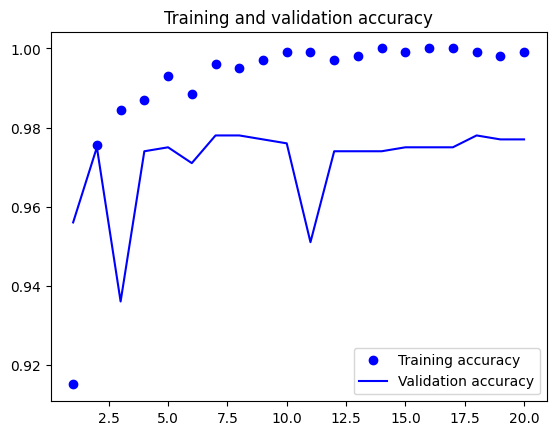

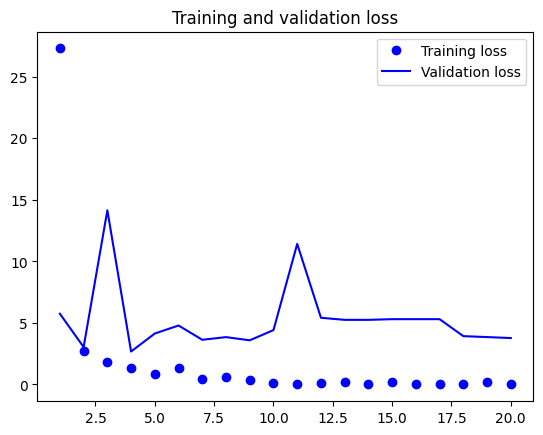

In [68]:
acc = history_vgg16.history["accuracy"]
val_acc = history_vgg16.history["val_accuracy"]
loss = history_vgg16.history["loss"]
val_loss = history_vgg16.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

After observing the above graphs we can see that overfitting occur around 4 epoch

1/1 [==============================] - 1s 665ms/step


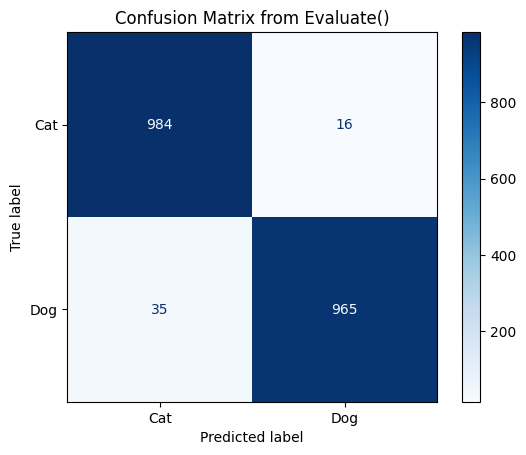

Classification Report:
              precision    recall  f1-score   support

         Cat       0.97      0.98      0.97      1000
         Dog       0.98      0.96      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [78]:
# Step 1: Initialize arrays to collect true labels and predictions
y_true = []
y_pred = []

# Step 2: Use `evaluate()` loop to populate `y_true` and `y_pred`
for images, labels in test_dataset:
    features = conv_base.predict(keras.applications.vgg16.preprocess_input(images))
    outputs = test_model_VGG16(features, training=False)  # Get outputs from the model during evaluation
    y_true.extend(labels.numpy())  # Append true labels
    y_pred.extend((outputs.numpy() > 0.5).astype(int))  # Append binary predictions

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 3: Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Cat", "Dog"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix from Evaluate()")
plt.show()

# Generate classification metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))



Summary
- Precision:
    - Cat: 0.97
        - Out of all the samples predicted as "Cat," 97% are correct.
    - Dog: 0.98
        - Out of all the samples predicted as "Dog," 98% are correct.
    - The model has slightly better precision for "Dog" than for "Cat."
- Recall:
    - Cat: 0.98
        - The model correctly identifies 98% of the actual "Cat" samples.
    - Dog: 0.96
        - The model correctly identifies 96% of the actual "Dog" samples.
    - The recall for "Dog" is slightly lower than for "Cat," indicating some "Dog" samples are misclassified.
- F1-Score:
    - Cat: 0.97
    - Dog: 0.97
    - F1-scores are balanced between the two classes, reflecting strong overall performance.

- Accuracy: 97%
- The model correctly classifies 1,940 out of 2,000 samples.

----------------- 



**Part Two - Fine Tune by VGG16 to predict depending on features from imagenet**

In [28]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

##### Freezing the layers until last fourth layer

In [30]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

##### Applying data augmentation and adding a classifier to Convolutional base

In [31]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [32]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                           

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/fine_Tune_Augmented.h5",
        save_best_only=True,
        monitor="val_loss")
]
history_vgg16_dataaugmented = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 137s 2s/step - loss: 24.6543 - accuracy: 0.8820 - val_loss: 2.2270 - val_accuracy: 0.9790
Epoch 2/50
63/63 [==============================] - 133s 2s/step - loss: 6.4410 - accuracy: 0.9460 - val_loss: 10.9935 - val_accuracy: 0.9440
Epoch 3/50
63/63 [==============================] - 133s 2s/step - loss: 5.9343 - accuracy: 0.9570 - val_loss: 2.6555 - val_accuracy: 0.9770
Epoch 4/50
63/63 [==============================] - 133s 2s/step - loss: 6.2682 - accuracy: 0.9545 - val_loss: 4.6096 - val_accuracy: 0.9720
Epoch 5/50
63/63 [==============================] - 134s 2s/step - loss: 3.1002 - accuracy: 0.9715 - val_loss: 3.4985 - val_accuracy: 0.9760
Epoch 6/50
63/63 [==============================] - 139s 2s/step - loss: 3.9003 - accuracy: 0.9625 - val_loss: 3.1256 - val_accuracy: 0.9780
Epoch 7/50
63/63 [==============================] - 148s 2s/step - loss: 3.6330 - accuracy: 0.9730 - val_loss: 3.0686 - val_accuracy: 0.9760
Epoch 8/50


In [82]:
best_model_VGG16_Fine_Tuned = keras.models.load_model( "./models/fine_Tune_Augmented.h5")
test_loss, test_acc = best_model_VGG16_Fine_Tuned.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 96s 2s/step - loss: 1.7804 - accuracy: 0.9760
Test accuracy: 0.976


The accuracy of the best model is around 98% (97.6%)

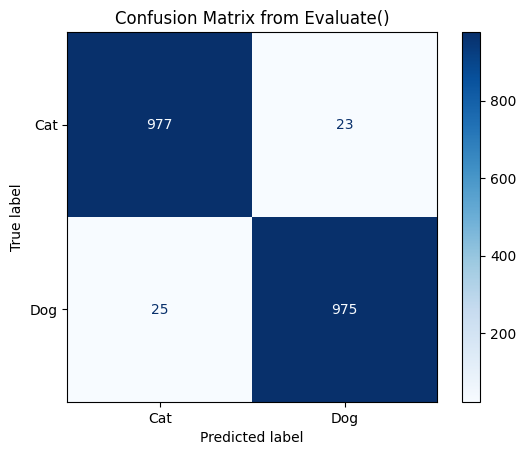

Classification Report:
              precision    recall  f1-score   support

         Cat       0.98      0.98      0.98      1000
         Dog       0.98      0.97      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [83]:
# Step 1: Initialize arrays to collect true labels and predictions
y_true = []
y_pred = []

# Step 2: Use `evaluate()` loop to populate `y_true` and `y_pred`
for images, labels in test_dataset:
    outputs = best_model_VGG16_Fine_Tuned(images, training=False)  # Get outputs from the model during evaluation
    y_true.extend(labels.numpy())  # Append true labels
    y_pred.extend((outputs.numpy() > 0.5).astype(int))  # Append binary predictions

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 3: Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Cat", "Dog"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix from Evaluate()")
plt.show()

# Generate classification metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))

#### Summary
- Precision:

    - The proportion of predicted positive labels that are correct.
    - For both classes ("Cat" and "Dog"), precision is 0.98, meaning the model predicts these classes with high accuracy and very few false positives.

- Recall:

    - The proportion of actual positive labels that are correctly identified.
    - "Cat" recall: 0.98 — The model identifies 98% of actual cats correctly.
    - "Dog" recall: 0.97 — The model identifies 97% of actual dogs correctly.
- F1-Score:

    - The harmonic mean of precision and recall, balancing the two metrics.
    - For both classes, the F1-score is 0.98, showing a good trade-off between precision and recall.
- Accuracy:
    - The percentage of total predictions that are correct.
    - Accuracy is 98%, meaning 1,960 out of 2,000 samples were classified correctly.

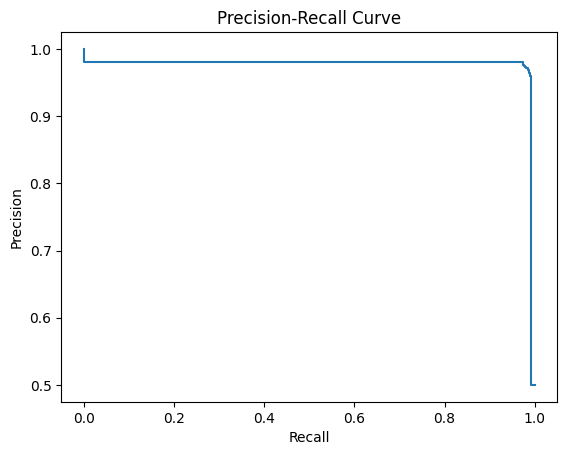

In [84]:
# Step 1: Initialize arrays to collect true labels and predictions
y_true = []
y_scores = []  # To collect the predicted scores (probabilities)

# Step 2: Use `evaluate()` loop to populate `y_true` and `y_scores`
for images, labels in test_dataset:
    outputs = best_model_VGG16_Fine_Tuned(images, training=False)  # Get outputs from the model during evaluation
    y_true.extend(labels.numpy())  # Append true labels
    y_scores.extend(outputs.numpy())  # Append predicted probabilities

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Step 3: Compute precision and recall
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Step 4: Plot the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

- High Precision at Most Recall Values:
    - The curve stays close to 1 for a large portion of the plot, indicating that the model makes very few false positive predictions for most threshold values.
    - This is a good sign if minimizing false positives is a priority.
- Sudden Drop at High Recall:
    - Near the far-right of the curve, where recall approaches 1, precision drops sharply.
    - This indicates that the model starts predicting more false positives to capture all true positives, which harms precision.

#### Explore specific examples in which the model failed to predict correctly.

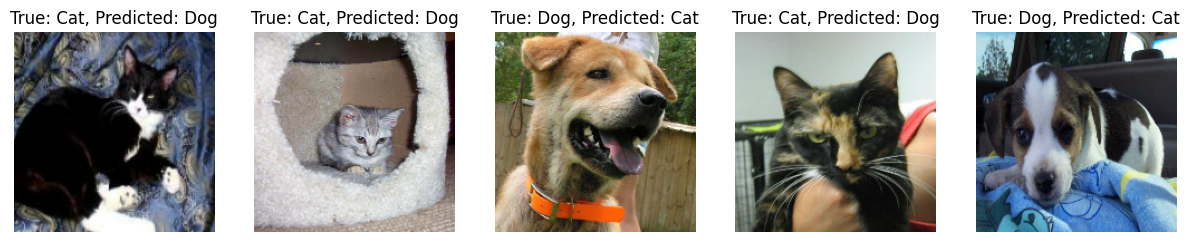

In [ ]:
# Function to display misclassified examples
def display_failures(test_dataset, model, class_names, num_failures=5):
    
    count = 0
    plt.figure(figsize=(15, 10))
    for images, labels in test_dataset.unbatch():
        # Get the model's output
        outputs = model(images[None, ...], training=False)  # Add batch dimension
        prediction = (outputs.numpy() > 0.5).astype(int)  # Binary prediction (0 or 1)

        # Check if the prediction is incorrect
        if prediction[0][0] != labels.numpy():
            count += 1
            plt.subplot(1, num_failures, count)
            plt.imshow(images.numpy().astype("uint8"))
            plt.title(f"True: {class_names[labels.numpy()]}, Predicted: {class_names[prediction[0][0]]}")
            plt.axis("off")

            if count == num_failures:
                break
    plt.show()

# Class names for the dataset
class_names = ["Cat", "Dog"]

# Call the function to display 5 misclassified examples
display_failures(test_dataset, test_model_CNN, class_names, num_failures=5)


## Final Conclusions

- Performance Improvement Through Fine-Tuning:

    - The Fine-Tuned VGG16 achieved the best overall performance with 98% accuracy, outperforming both the Unfine-Tuned VGG16 (97%) and the Vanilla CNN (75%). Fine-tuning significantly improved precision, recall, and f1-scores for both classes, demonstrating the advantage of leveraging pre-trained feature extraction along with domain-specific fine-tuning.
- Impact of Pre-trained Models:
    - Both the Fine-Tuned VGG16 and Unfine-Tuned VGG16 significantly outperformed the Vanilla CNN in all metrics. This highlights the power of transfer learning with  pre-trained models like VGG16 compared to training a CNN from scratch, particularly when working with a relatively smaller dataset.
- Marginal Gains from Fine-Tuning:
    - While the Unfine-Tuned VGG16 already performed exceptionally well (97% accuracy), fine-tuning provided an incremental improvement in precision, recall, and f1-scores. This suggests that fine-tuning helps the model adapt better to the specific dataset, refining its ability to distinguish between the two classes.